In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ds = pd.read_csv("../data/Smoker_dataset.csv")
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Gene2337   1022 non-null   float64
 1   Gene35715  1020 non-null   float64
 2   Gene12936  1020 non-null   float64
 3   Gene1689   1020 non-null   float64
 4   FGFR1      1021 non-null   float64
 5   GATA4      1021 non-null   float64
 6   type       1023 non-null   object 
 7   Condition  1023 non-null   object 
dtypes: float64(6), object(2)
memory usage: 64.1+ KB


Немного переименую столбцы

In [3]:
ds = ds.rename(columns = {"type" : "Is smoker?", "Condition" : "Has cancer?"})
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gene2337     1022 non-null   float64
 1   Gene35715    1020 non-null   float64
 2   Gene12936    1020 non-null   float64
 3   Gene1689     1020 non-null   float64
 4   FGFR1        1021 non-null   float64
 5   GATA4        1021 non-null   float64
 6   Is smoker?   1023 non-null   object 
 7   Has cancer?  1023 non-null   object 
dtypes: float64(6), object(2)
memory usage: 64.1+ KB


Пример данных

In [4]:
ds.head()

,Gene2337,Gene35715,Gene12936,Gene1689,FGFR1,GATA4,Is smoker?,Has cancer?
0,-4.750470,-1.518091,6.715013,-1.722331,0.170110,-7.846961,Smoker,Cancer
1,-5.183375,0.039654,2.529460,-1.323490,-0.315844,-4.447406,Smoker,Cancer
2,1.579079,1.588153,0.569724,-1.229601,-4.119116,0.649277,Smoker,Normal
3,-1.557053,-3.818996,3.798518,-1.204911,1.010464,-6.712354,Smoker,Cancer
4,-1.329637,-3.623963,2.722249,-0.784387,1.564218,-5.580853,Smoker,Cancer


In [5]:
ds.isna().sum()

Gene2337       1
Gene35715      3
Gene12936      3
Gene1689       3
FGFR1          2
GATA4          2
Is smoker?     0
Has cancer?    0
dtype: int64

Есть пропуски, их нужно удалить

In [6]:
ds = ds.dropna()
ds.isna().sum()

Gene2337       0
Gene35715      0
Gene12936      0
Gene1689       0
FGFR1          0
GATA4          0
Is smoker?     0
Has cancer?    0
dtype: int64

Функция для преобразования категориального признака в числовой

In [7]:
categories = dict()

def preprocessCategories(dataset, col):
    vals = set()
    cnt = 0
    for elem in dataset[col]:
        if (elem not in vals):
            vals.add(elem)
            categories[(col, elem)] = cnt
            cnt += 1

def encodeCategorial(x, y):
    return categories[(x, y)]

genes = ["Gene2337", "Gene35715", "Gene12936", "Gene1689", "FGFR1", "GATA4"]
categorial = ["Is smoker?", "Has cancer?"]

for s in categorial:
    preprocessCategories(ds, s)
    ds[s] = [encodeCategorial(s, elem) for elem in ds[s]]

ds.head()

,Gene2337,Gene35715,Gene12936,Gene1689,FGFR1,GATA4,Is smoker?,Has cancer?
0,-4.750470,-1.518091,6.715013,-1.722331,0.170110,-7.846961,0,0
1,-5.183375,0.039654,2.529460,-1.323490,-0.315844,-4.447406,0,0
2,1.579079,1.588153,0.569724,-1.229601,-4.119116,0.649277,0,1
3,-1.557053,-3.818996,3.798518,-1.204911,1.010464,-6.712354,0,0
4,-1.329637,-3.623963,2.722249,-0.784387,1.564218,-5.580853,0,0


Получено, что $0$ - курящий, $1$ - некурящий, что $0$ - есть рак лёгких, $1$ - лёгкие в норме. Поменяю $0$ на $1$ и $1$ на $0$ для эстетики.

In [8]:
for s in categorial:
    ds[s] = [1 - elem for elem in ds[s]]

ds.head()

,Gene2337,Gene35715,Gene12936,Gene1689,FGFR1,GATA4,Is smoker?,Has cancer?
0,-4.750470,-1.518091,6.715013,-1.722331,0.170110,-7.846961,1,1
1,-5.183375,0.039654,2.529460,-1.323490,-0.315844,-4.447406,1,1
2,1.579079,1.588153,0.569724,-1.229601,-4.119116,0.649277,1,0
3,-1.557053,-3.818996,3.798518,-1.204911,1.010464,-6.712354,1,1
4,-1.329637,-3.623963,2.722249,-0.784387,1.564218,-5.580853,1,1


In [9]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 1019
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Gene2337     1012 non-null   float64
 1   Gene35715    1012 non-null   float64
 2   Gene12936    1012 non-null   float64
 3   Gene1689     1012 non-null   float64
 4   FGFR1        1012 non-null   float64
 5   GATA4        1012 non-null   float64
 6   Is smoker?   1012 non-null   int64  
 7   Has cancer?  1012 non-null   int64  
dtypes: float64(6), int64(2)
memory usage: 71.2 KB


Функция для визуализации распределения количественных признаков

In [10]:
def visualize(dataset):
    fig, ax = plt.subplots(2, 3, figsize = (20, 10))
    fig.suptitle('Распределения числовых признаков')
    for i in range(6):
        sns.histplot(ds[genes[i]], ax = ax[i // 3][i % 3], kde = True)
    pass

Визуализирую полученные данные

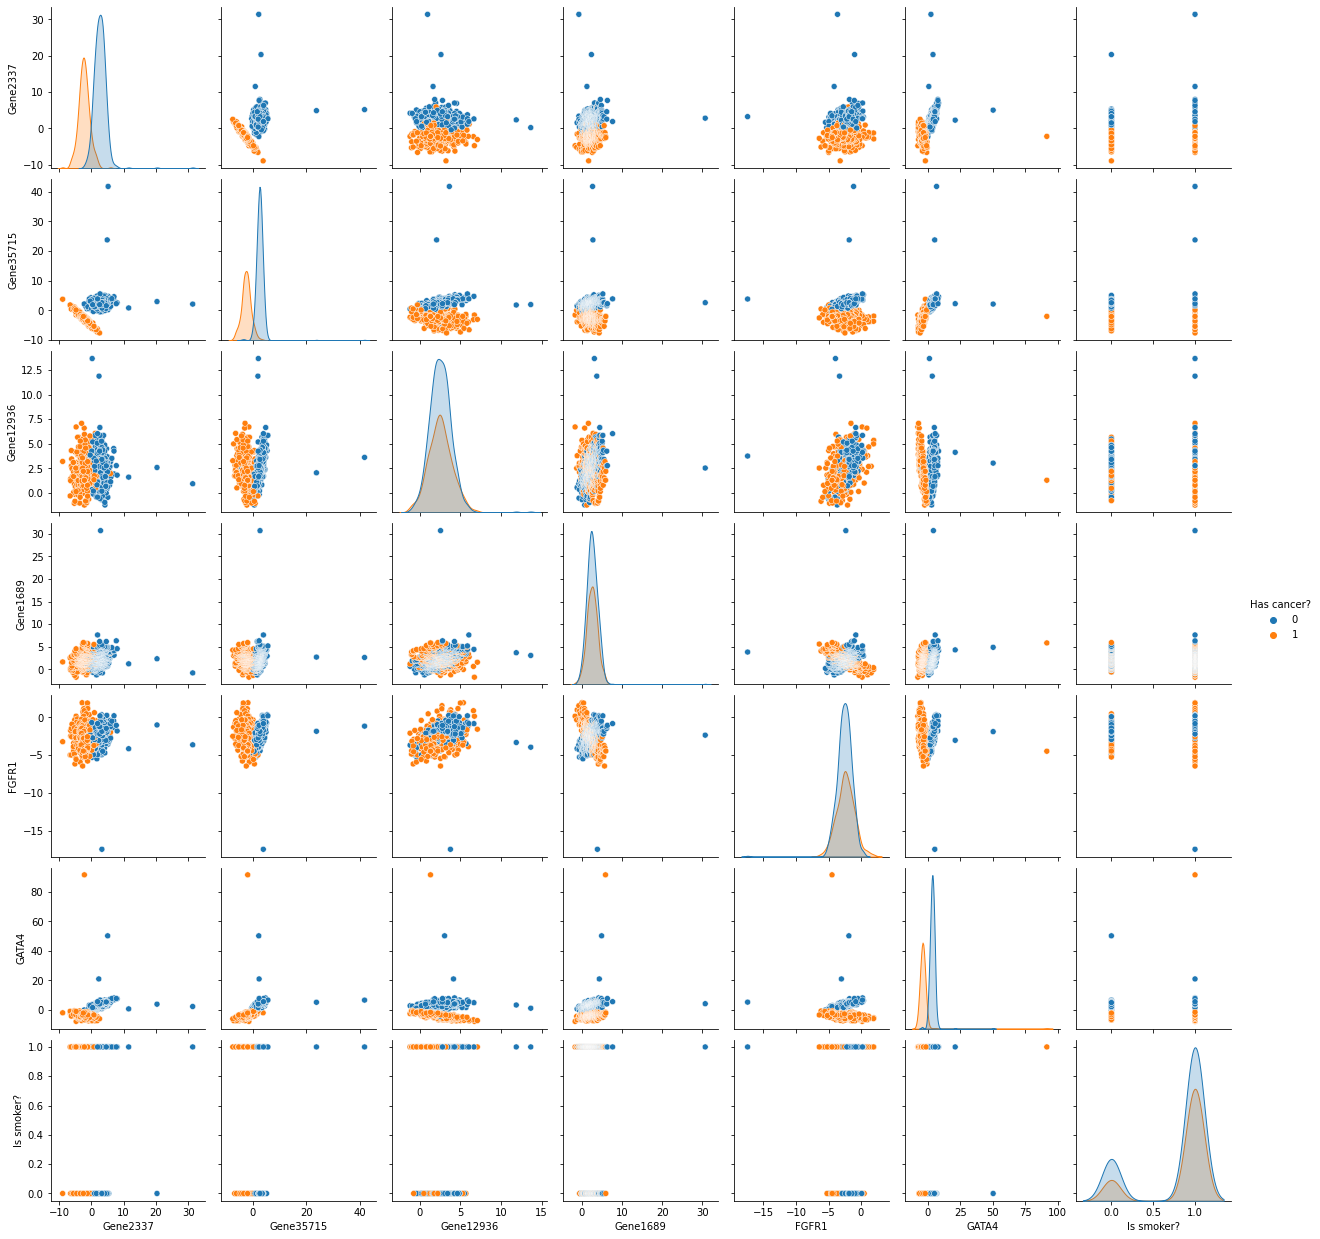

In [11]:
sns.pairplot(data = ds, hue = "Has cancer?")
pass

In [12]:
ds.corr()

,Gene2337,Gene35715,Gene12936,Gene1689,FGFR1,GATA4,Is smoker?,Has cancer?
Gene2337,1.000000,0.544628,0.000734,0.107425,0.096349,0.593245,-0.042036,-0.775464
Gene35715,0.544628,1.000000,0.073073,0.036923,0.041562,0.639716,-0.060720,-0.783274
Gene12936,0.000734,0.073073,1.000000,0.216402,0.366034,-0.029887,0.024741,-0.007393
Gene1689,0.107425,0.036923,0.216402,1.000000,-0.040987,0.192487,0.005161,-0.019194
FGFR1,0.096349,0.041562,0.366034,-0.040987,1.000000,0.007477,-0.006213,0.063710
GATA4,0.593245,0.639716,-0.029887,0.192487,0.007477,1.000000,-0.063206,-0.682026
Is smoker?,-0.042036,-0.060720,0.024741,0.005161,-0.006213,-0.063206,1.000000,0.071193
Has cancer?,-0.775464,-0.783274,-0.007393,-0.019194,0.063710,-0.682026,0.071193,1.000000


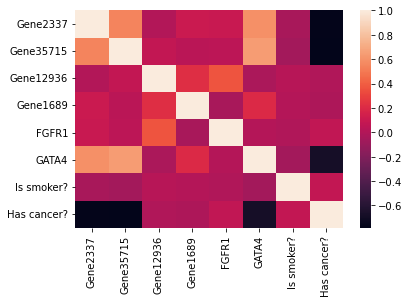

In [13]:
sns.heatmap(ds.corr())
pass

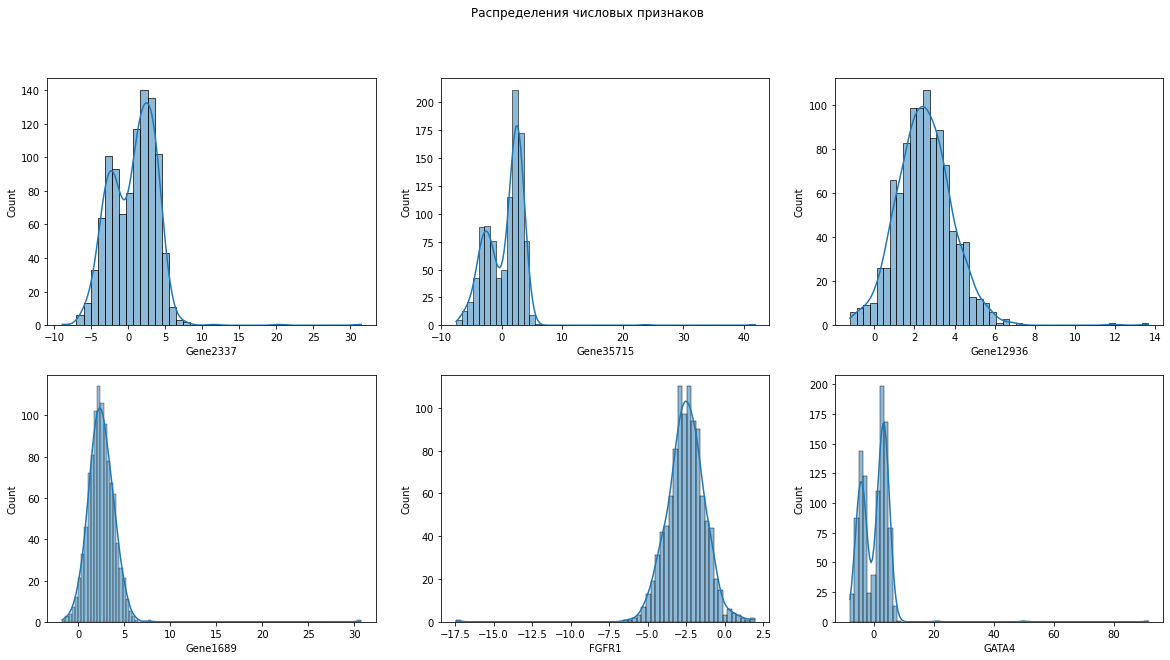

In [14]:
visualize(ds)

Имеется небольшое количество выбросов. Удалю все данные, в которых число в хотя бы одном параметре по модулю больше 10

In [15]:
bad_ids = set()
GOOD = 10.0

for gene in genes:
    ds = ds.loc[abs(ds[gene]) <= GOOD]

ds.shape

(1000, 8)

Визуализирую данные после удаления выбросов

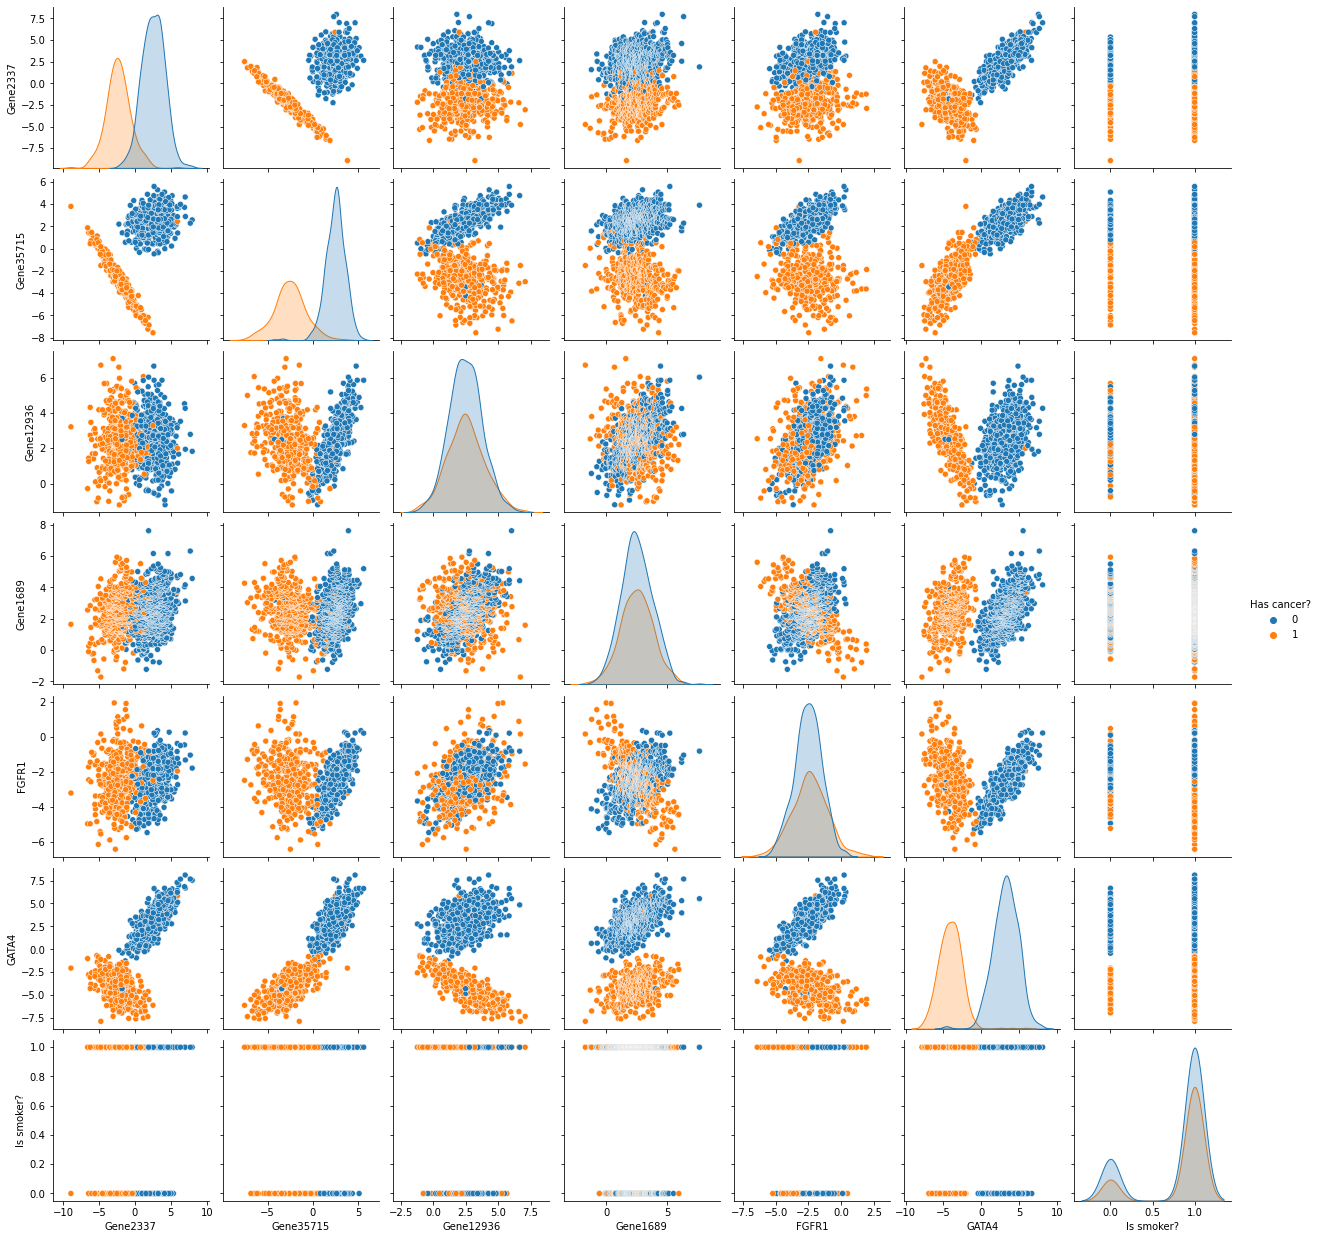

In [16]:
sns.pairplot(data = ds, hue = "Has cancer?")
pass

In [17]:
ds.corr()

,Gene2337,Gene35715,Gene12936,Gene1689,FGFR1,GATA4,Is smoker?,Has cancer?
Gene2337,1.000000,0.619947,0.008091,0.154516,0.126898,0.832779,-0.038228,-0.823337
Gene35715,0.619947,1.000000,0.068074,0.031691,0.043801,0.927802,-0.078963,-0.867611
Gene12936,0.008091,0.068074,1.000000,0.264439,0.442553,-0.041054,0.019888,0.006818
Gene1689,0.154516,0.031691,0.264439,1.000000,-0.042761,0.197440,-0.002214,-0.007268
FGFR1,0.126898,0.043801,0.442553,-0.042761,1.000000,0.057841,0.005249,0.060171
GATA4,0.832779,0.927802,-0.041054,0.197440,0.057841,1.000000,-0.072880,-0.910346
Is smoker?,-0.038228,-0.078963,0.019888,-0.002214,0.005249,-0.072880,1.000000,0.071518
Has cancer?,-0.823337,-0.867611,0.006818,-0.007268,0.060171,-0.910346,0.071518,1.000000


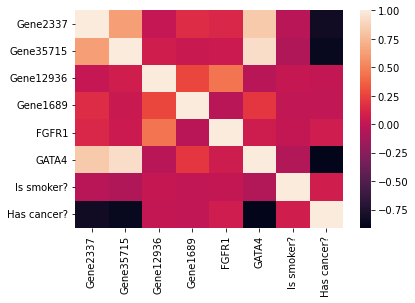

In [18]:
sns.heatmap(ds.corr())
pass

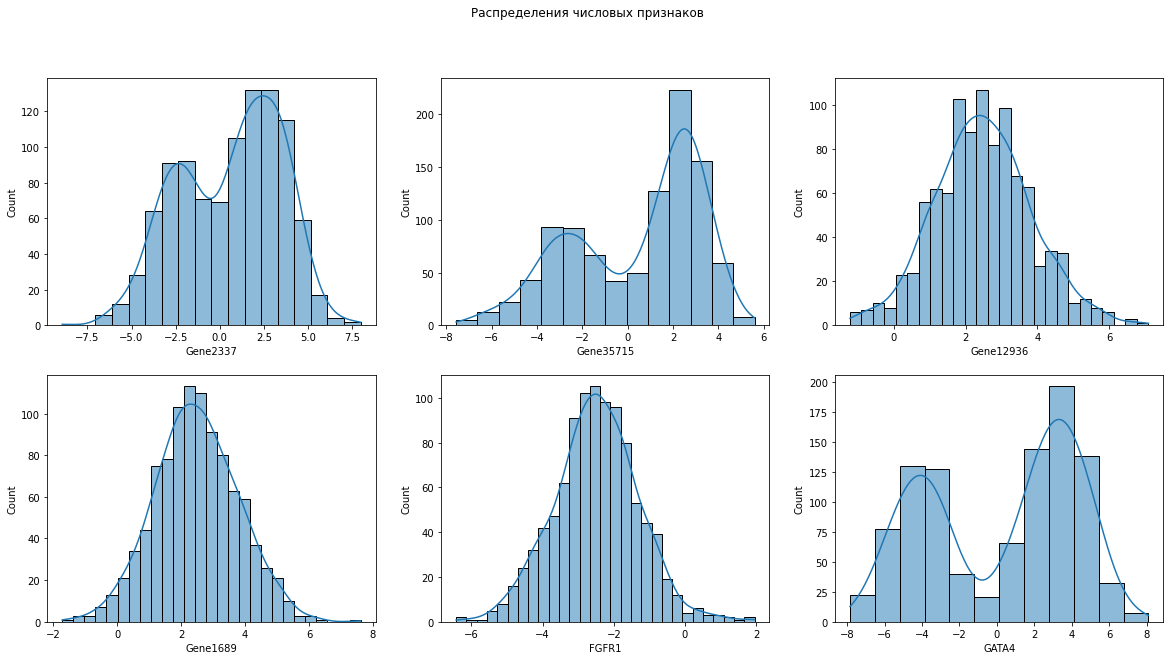

In [19]:
visualize(ds)

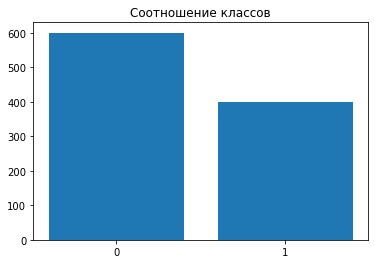

In [20]:
indexes = [0, 1]
cnts = ds['Has cancer?'].value_counts().values

plt.title("Соотношение классов")
plt.xticks(indexes)
plt.bar(indexes, cnts)
plt.show()